# Time-frequency analysis and basic filtering

In this exercise we load a sample seismogram and perform a time-frequency analysis and basic filtering. The seismogram is from a seismic station in Albuquerque New Mexico. You can vary the component that is shown (Z,N,E). This is followed by an application to an arbitrary seismogram from a station of your choice. 

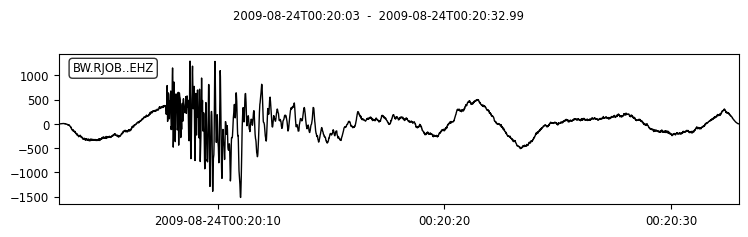

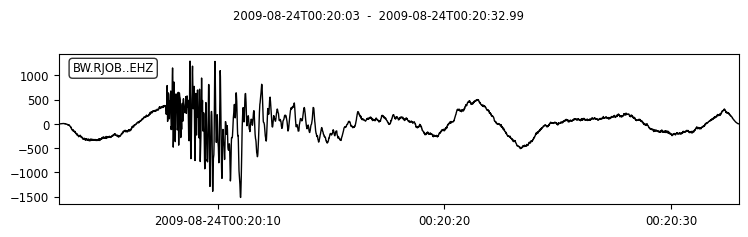

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read
st = read()  # load example seismogram
st = st.select(component='Z')
st.plot()

We can get at information of the seismogram (e.g., the sampling frequency) by typing "print(st)"

In [22]:
print(st[0])

BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


Now we can first look at the frequency content of the signal using exactly the same code as before!

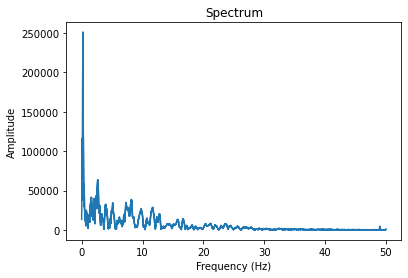

In [23]:
# With a sampling frequency of 100Hz we can get the sampling interval
dt = 1./100.    # .. which is 1 divided by the sampling rate

# We convert the obsPy trace into a vector with amplitudes 
tr = st[0]
f  = tr[:3000]

# Calculate and plot spectrum
spec = np.fft.fft(f) # source time function in frequency domain
freq = np.fft.fftfreq(spec.size, d = dt ) # time domain to frequency domain

plt.plot(np.abs(freq), np.abs(spec)) # plot frequency and amplitude
plt.title('Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

We see the strange energy at low frequencies! Let us lowpass filter and plot again!

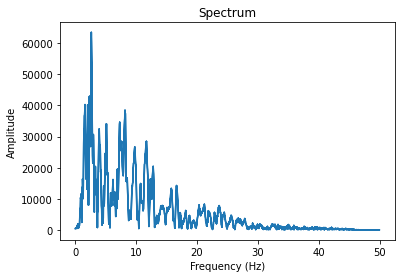

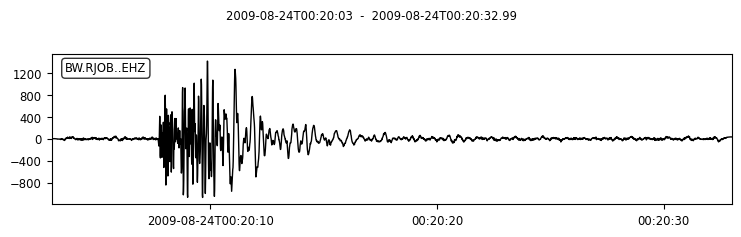

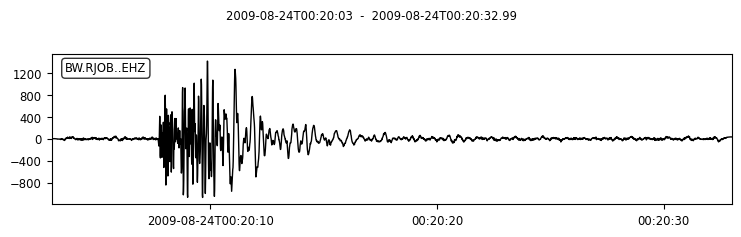

In [24]:
st.filter(type='highpass', freq=1)
st.filter(type='lowpass', freq=45)

# We convert the obsPy trace into a vector with amplitudes 
tr = st[0]
f  = tr[:3000]

# Calculate and plot spectrum
spec = np.fft.fft(f) # source time function in frequency domain
freq = np.fft.fftfreq(spec.size, d = dt ) # time domain to frequency domain

plt.plot(np.abs(freq), np.abs(spec)) # plot frequency and amplitude
plt.title('Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

st.plot()



That analysis does NOT tell us WHEN which frequency arrives, so we calculate a "spectrogram", that is the time-frequency analysis 

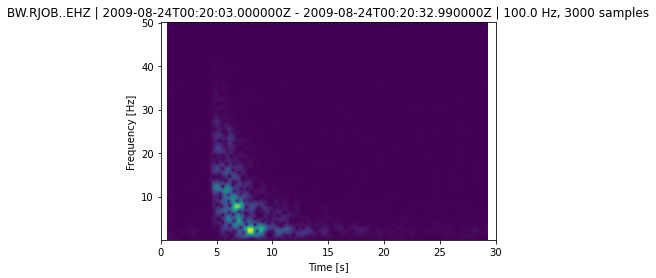

[None]

In [25]:
st.spectrogram()

Explain the time-frequency analysis and discuss the above figure! Get information on the parameters of the spectrogram() function from the ObsPy documentation (link below), change the parameters (overlap, window length, etc) and discuss the impact.

https://docs.obspy.org/packages/autogen/obspy.imaging.spectrogram.spectrogram.html?highlight=spectrogram#obspy.imaging.spectrogram.spectrogram

#  Filtering

Play around with the simple lowpass and highpass functions of ObsPy. How does it change the seismogram? How low/high can you go with the filters to still see a physical signal?

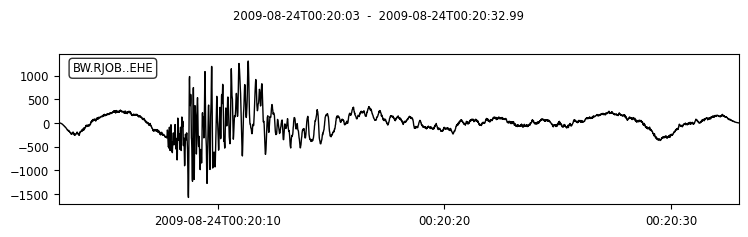

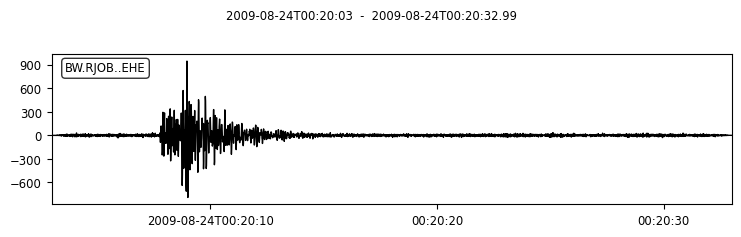

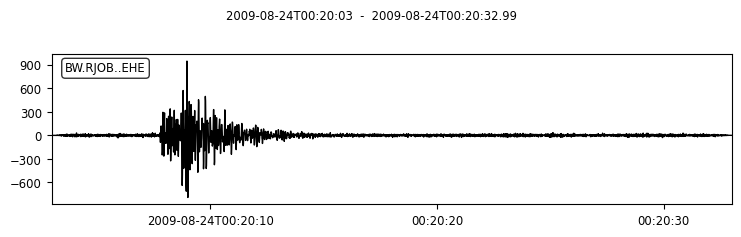

In [26]:
st = read()  # load example seismogram
st = st.select(component='E')
st.plot()

st.filter("highpass", freq=10)
#st.filter("lowpass", freq=10)

st.plot()

#### Real Data Exercise

The code below allows you to get data from many stations via the IRIS client. The default gets you the data from the Tohoku earthquake recorded at the PFO station in California.


* Check out various simple filters to highlight body and surface waves 
* Find an optimal way to plot the time-frequency analysis of these data
* Find another large earthquake and perform the same analysis (e.g. seek a very deep earthquake)
* Find a quite time window without earthquakes and do a time-frequency analysis, do you see the microseism? 



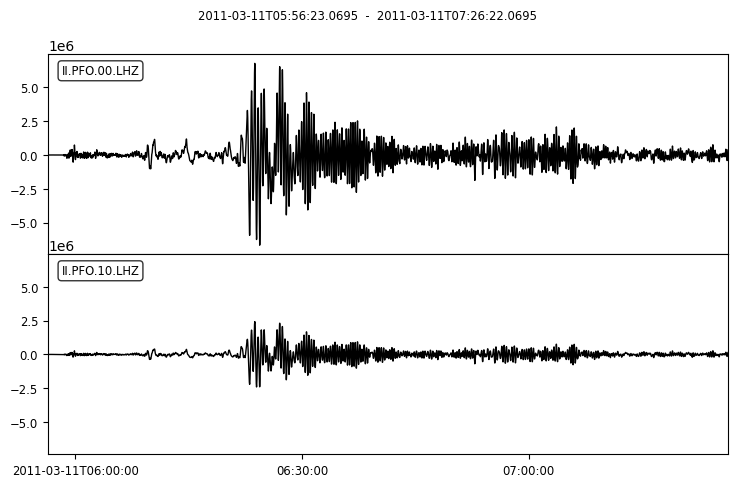

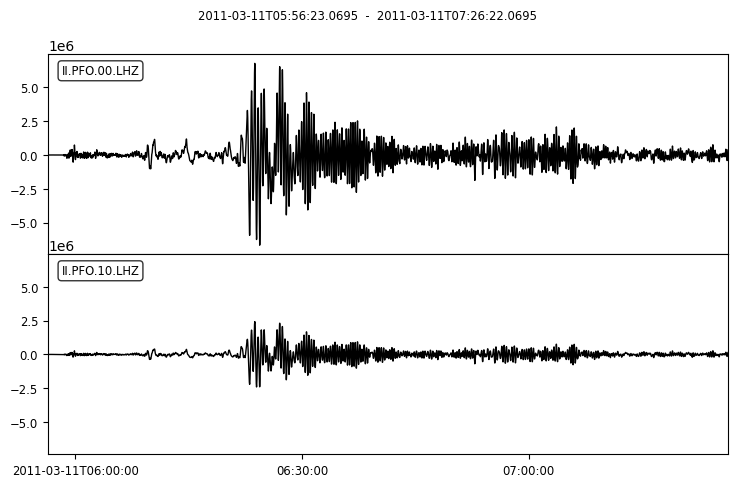

In [28]:
# Code to get data

import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

# Define the client from which to get the data, IRIS is a data base in Seattle, USA
client = Client("IRIS")
# Define start stime
t = UTCDateTime("2011-03-11T05:46:23")  # Tohoku origin ti9me
# Get waveform data from station PFO (in California) 10 mins to 100 mins after the origin time
st = client.get_waveforms("II", "PFO", "*", "LHZ",
                          t + 10 * 60, t + 100 * 60)
# Plot the data
st.plot()

